# Jupyter Notebook of Carlos Moreno Fernandez

Here is the Jupyter Notebook that you can use to run your code. Remember that you data needs to be uploaded to the GitHub repository before you can use it. I recommend you to upload in the folder called *StudentProjects*.

There are a lot of information on how to use Jupyter Notebook on Internet. Here, I will add a small list of actions:
* Use the *Insert* menu to insert new cells
* Use the *Cell/Cell type* menu to change the style of a given cell: *Code* if you want to add Python code and *Markdown* if you want to add an informative cell
* Each cell can be executed individually. Then I recommend to include limited number of code lines in each of them.
* Use the *Edit* menu to delete cells.
* Remember to save your code once you add it.
* If when you run your code, you have errors due to libraries not included in the repository, please contact me.

If you have questions regarding the environment, please email me or use Teams.

In [7]:
# Data Processing
# ==============================================================================
import numpy as np
import pandas as pd
from tabulate import tabulate

# Graphs
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Processin and Modeling
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge

from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt import gp_minimize
from skopt.plots import plot_convergence

# Others
# ==============================================================================
import multiprocessing
import random
from itertools import product
from fitter import Fitter, get_common_distributions

# Matplotlib configuration
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [8]:
# header: indicates if the dataset has an initial line with the name of each column
dataset = pd.read_csv('Computer-Hardware-Dataset-data-header.csv', sep = ',')

In [9]:
dataset.head(5)

,Vendor Name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [10]:
# Column type
dataset.info()

TypeError: getsizeof(...)
    getsizeof(object, default) -> int

    Return the size of object in bytes.

sys.getsizeof(object, default) will always return default on PyPy, and
raise a TypeError if default is not provided.

First note that the CPython documentation says that this function may
raise a TypeError, so if you are seeing it, it means that the program
you are using is not correctly handling this case.

On PyPy, though, it always raises TypeError.  Before looking for
alternatives, please take a moment to read the following explanation as
to why it is the case.  What you are looking for may not be possible.

A memory profiler using this function is most likely to give results
inconsistent with reality on PyPy.  It would be possible to have
sys.getsizeof() return a number (with enough work), but that may or
may not represent how much memory the object uses.  It doesn't even
make really sense to ask how much *one* object uses, in isolation
with the rest of the system.  For example, instances have maps,
which are often shared across many instances; in this case the maps
would probably be ignored by an implementation of sys.getsizeof(),
but their overhead is important in some cases if they are many
instances with unique maps.  Conversely, equal strings may share
their internal string data even if they are different objects---or
empty containers may share parts of their internals as long as they
are empty.  Even stranger, some lists create objects as you read
them; if you try to estimate the size in memory of range(10**6) as
the sum of all items' size, that operation will by itself create one
million integer objects that never existed in the first place.


In [11]:
# Dataset dimensions
# ==============================================================================
dataset.shape

(209, 10)

In [13]:
# Number of NULL per variable
# ==============================================================================
dataset.isna().sum().sort_values()

Vendor Name    0
Model Name     0
MYCT           0
MMIN           0
MMAX           0
CACH           0
CHMIN          0
CHMAX          0
PRP            0
ERP            0
dtype: int64

No variable contains missing values.

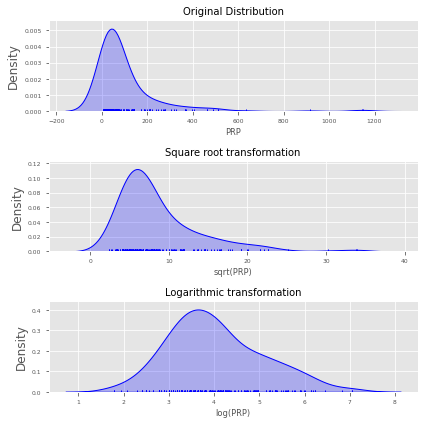

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.distplot(
    dataset.PRP,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Original Distribution", fontsize = 'medium')
axes[0].set_xlabel('PRP', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(dataset.PRP),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Square root transformation", fontsize = 'medium')
axes[1].set_xlabel('sqrt(PRP)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(dataset.PRP),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Logarithmic transformation", fontsize = 'medium')
axes[2].set_xlabel('log(PRP)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

In [19]:
distribution = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']

fitter = Fitter(dataset.PRP, distributions=distribution)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

,sumsquare_error,aic,bic,kl_div
cauchy,0.000095,1983.614213,-3042.632444,inf
expon,0.000140,2072.617242,-2959.964849,inf
chi2,0.000144,1971.040769,-2949.866711,inf
beta,0.000148,1945.968924,-2938.647443,inf
exponpow,0.000193,1889.626312,-2887.960129,inf
powerlaw,0.000317,1516.788219,-2784.582492,inf
logistic,0.000358,2532.284014,-2764.277526,inf
norm,0.000465,2493.804996,-2709.609298,inf
gamma,0.000523,5731.337212,-2679.542364,inf


In [20]:
# Num Variables
# ==============================================================================
dataset.select_dtypes(include=['float64', 'int']).describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


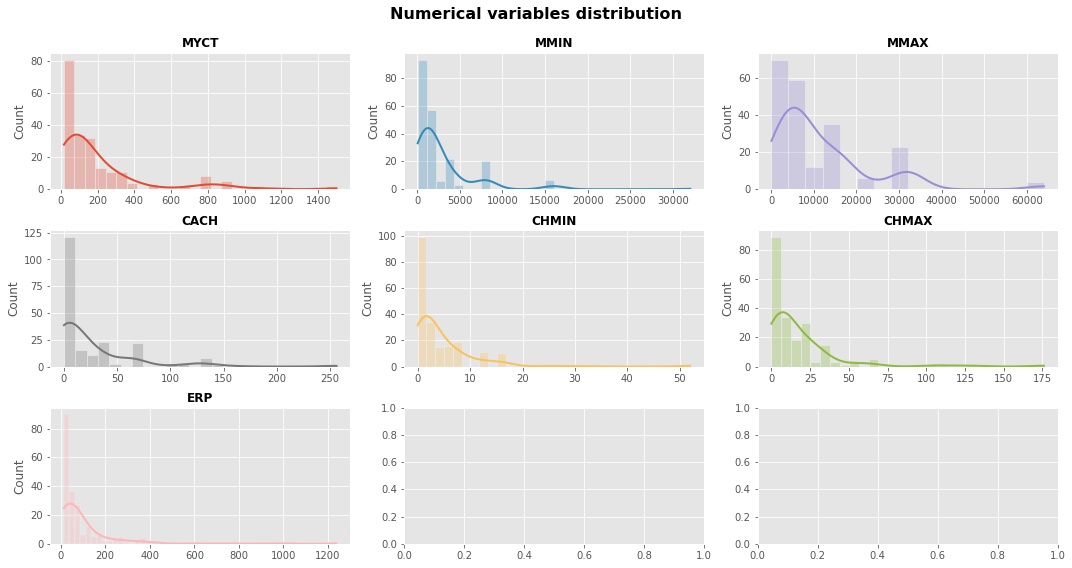

In [34]:
# Distribution graph for each numerical variable
# ==============================================================================
# Adjust number of subplots based on the number of columns
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = [40, 12]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 8))
axes = axes.flat
num_columns = dataset.select_dtypes(include=['float64', 'int']).columns
num_columns = num_columns.drop('PRP')

for i, colum in enumerate(num_columns):
    sns.histplot(
        data    = dataset,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Numerical variables distribution', fontsize = 16, fontweight = "bold");